4 peaks problem

In [1]:
import mlrose_hiive as mlrose
import numpy as np
import time
import matplotlib.pyplot as plt
seed = 42
np.random.seed(seed)

In [2]:
# Define the fitness function
fitness = mlrose.FourPeaks(t_pct=0.2)

# Define the optimization problem
problem = mlrose.DiscreteOpt(length=20, fitness_fn=fitness, maximize=True, max_val=2)

In [10]:
def run_algorithm(algorithm, problem, algorithm_name, random_seed,max_attempts=200,max_iters=1000):
    start_time = time.time()
    if algorithm_name == "RHC":
        best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, max_attempts=max_attempts, max_iters=max_iters, curve=True, random_state=random_seed)
    elif algorithm_name == "SA":
        best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, max_attempts=max_attempts, max_iters=max_iters, curve=True, random_state=random_seed)
    elif algorithm_name == "GA":
        best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, max_attempts=max_attempts, max_iters=max_iters, curve=True, random_state=random_seed)
    
    end_time = time.time()
    time_taken = end_time - start_time
    function_evals = len(fitness_curve)
    
    return best_fitness, fitness_curve, function_evals, time_taken

In [4]:
# Run algorithms and collect data
results = {}
for algo in ["RHC", "SA", "GA"]:
    fitness, curve, evals, time_taken = run_algorithm(algo, problem, algo, seed)
    results[algo] = {
        "fitness": fitness,
        "curve": curve,
        "evals": evals,
        "time": time_taken
    }

In [5]:
results.keys()

dict_keys(['RHC', 'SA', 'GA'])

RHC
SA
GA


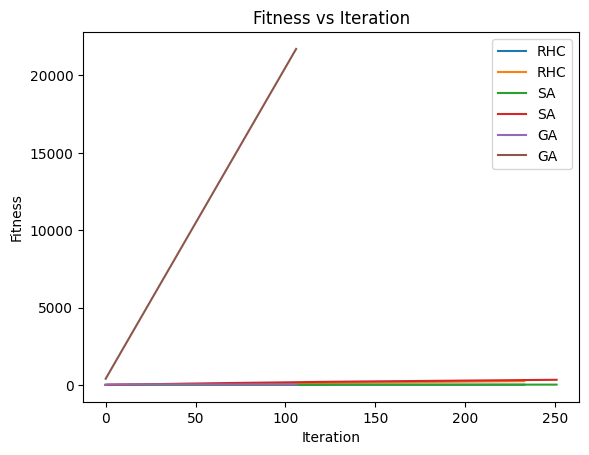

In [6]:
# Fitness / Iteration
plt.figure()
for algo in results:
    plt.plot(results[algo]["curve"], label=algo)
    print(algo)
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('Fitness vs Iteration')
plt.legend()
plt.show()


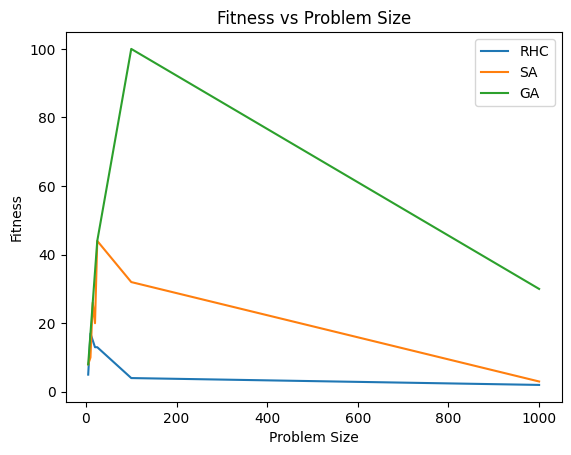

In [12]:
# Fitness / Problem Size
problem_sizes = [5, 10, 15, 20, 25,100,1000]
fitness_sizes = {"RHC": [], "SA": [], "GA": []}

for size in problem_sizes:
    # Define the optimization problem for each problem size
    fitness = mlrose.FourPeaks(t_pct=0.2)
    problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
    for algo in ["RHC", "SA", "GA"]:
        fitness, curve, evals, time_taken = run_algorithm(algo, problem, algo, seed, max_attempts=500, max_iters=50000)
        fitness_sizes[algo].append(fitness)

plt.figure()
for algo in fitness_sizes:
    plt.plot(problem_sizes, fitness_sizes[algo], label=algo)
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.title('Fitness vs Problem Size')
plt.legend()
plt.show()


In [ ]:
# Fitness / Problem Size with bigger iter
problem_sizes = [5, 10, 15, 20, 25,100,1000]
fitness_sizes = {"RHC": [], "SA": [], "GA": []}

for size in problem_sizes:
    # Define the optimization problem for each problem size
    fitness = mlrose.FourPeaks(t_pct=0.2)
    problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
    for algo in ["RHC", "SA", "GA"]:
        fitness, curve, evals, time_taken = run_algorithm(algo, problem, algo, seed)
        fitness_sizes[algo].append(fitness)

plt.figure()
for algo in fitness_sizes:
    plt.plot(problem_sizes, fitness_sizes[algo], label=algo)
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.title('Fitness vs Problem Size')
plt.legend()
plt.show()

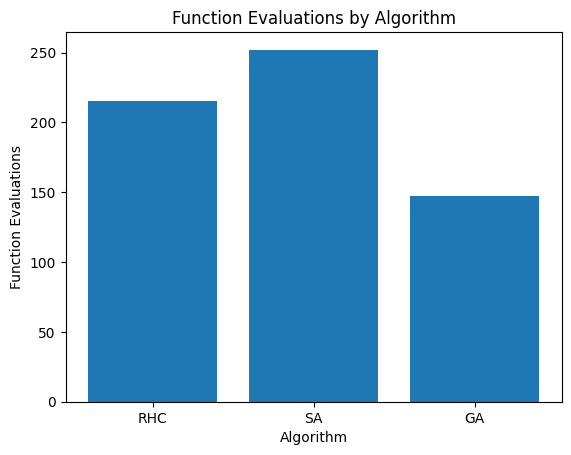

In [ ]:

# Function Evaluations
evals = [results[algo]["evals"] for algo in ["RHC", "SA", "GA"]]
plt.figure()
plt.bar(["RHC", "SA", "GA"], evals)
plt.xlabel('Algorithm')
plt.ylabel('Function Evaluations')
plt.title('Function Evaluations by Algorithm')
plt.show()

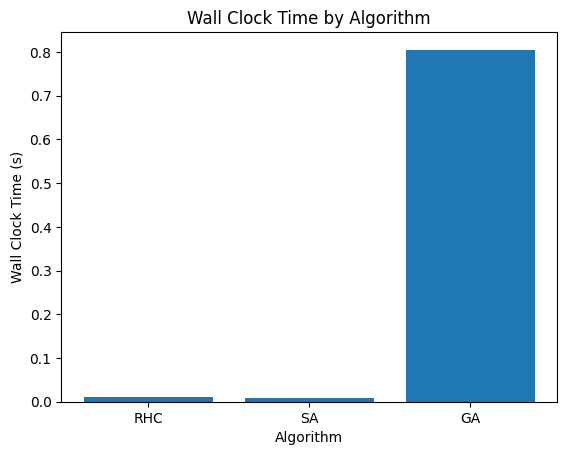

In [ ]:

# Wall Clock Time
times = [results[algo]["time"] for algo in ["RHC", "SA", "GA"]]
plt.figure()
plt.bar(["RHC", "SA", "GA"], times)
plt.xlabel('Algorithm')
plt.ylabel('Wall Clock Time (s)')
plt.title('Wall Clock Time by Algorithm')
plt.show()